# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['khandbari',
 'llanes',
 'mount gambier',
 'mount isa',
 'saleaula',
 'isiro',
 'anuchino',
 'maniitsoq',
 'palora',
 'korla',
 'itaobim',
 'saint-philippe',
 'busselton',
 'nishihara',
 'santa barbara',
 'oktyabrskoye',
 'puerto ayora',
 'veracruz',
 'chicomuselo',
 'tarakan',
 'belushya guba',
 'kapaa',
 'ushuaia',
 'bluff',
 'umzimvubu',
 'bambous virieux',
 'beibei',
 'punta arenas',
 'north battleford',
 'wilmington',
 'tual',
 'saskylakh',
 'jamestown',
 'bredasdorp',
 'atuona',
 'hermanus',
 'santa fe',
 'husavik',
 'mahebourg',
 'kupang',
 'yellowknife',
 'rikitea',
 'taolanaro',
 'puerto escondido',
 'lebu',
 'ejido',
 'sao filipe',
 'albany',
 'sola',
 'lorengau',
 'tasiilaq',
 'rafai',
 'hobyo',
 'ngunguru',
 'mineiros',
 'eureka',
 'hithadhoo',
 'spitsevka',
 'carnarvon',
 'hobart',
 'kingisepp',
 'longyearbyen',
 'quatre cocos',
 'egvekinot',
 'sunrise manor',
 'torbay',
 'fort nelson',
 'almaznyy',
 'christchurch',
 'paramirim',
 'garissa',
 'san policarpo',
 'norman wel

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [13]:
#Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=72d280ce04d25900cd45476734effbdb&units=imperial&q='

In [14]:
# Set up lists to hold reponse info
names = []
temp = []
resp_obj=[]
lat=[]
long=[]
cloudiness=[]
windspeed=[]
humidity=[]
country=[]
date=[]
cnt = 0
for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        resp_obj.append(response)
        names.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing record {i+1} of {len(cities)} for the city: {city}')
        time.sleep(0.5)
    except:
        print(f'City not found.')  

Processing record 1 of 619 for the city: khandbari
Processing record 2 of 619 for the city: llanes
Processing record 3 of 619 for the city: mount gambier
Processing record 4 of 619 for the city: mount isa
City not found.
Processing record 6 of 619 for the city: isiro
Processing record 7 of 619 for the city: anuchino
Processing record 8 of 619 for the city: maniitsoq
Processing record 9 of 619 for the city: palora
Processing record 10 of 619 for the city: korla
Processing record 11 of 619 for the city: itaobim
Processing record 12 of 619 for the city: saint-philippe
Processing record 13 of 619 for the city: busselton
Processing record 14 of 619 for the city: nishihara
Processing record 15 of 619 for the city: santa barbara
Processing record 16 of 619 for the city: oktyabrskoye
Processing record 17 of 619 for the city: puerto ayora
Processing record 18 of 619 for the city: veracruz
Processing record 19 of 619 for the city: chicomuselo
Processing record 20 of 619 for the city: tarakan
Cit

Processing record 167 of 619 for the city: tiksi
Processing record 168 of 619 for the city: black river
Processing record 169 of 619 for the city: sapa
Processing record 170 of 619 for the city: constantine
Processing record 171 of 619 for the city: samarai
Processing record 172 of 619 for the city: keti bandar
Processing record 173 of 619 for the city: ostrovnoy
Processing record 174 of 619 for the city: ambilobe
Processing record 175 of 619 for the city: santa cruz
Processing record 176 of 619 for the city: kodiak
Processing record 177 of 619 for the city: jizan
City not found.
Processing record 179 of 619 for the city: salvador
Processing record 180 of 619 for the city: kavieng
Processing record 181 of 619 for the city: manavalakurichi
Processing record 182 of 619 for the city: tilichiki
Processing record 183 of 619 for the city: padang
Processing record 184 of 619 for the city: georgetown
Processing record 185 of 619 for the city: haines junction
Processing record 186 of 619 for th

Processing record 335 of 619 for the city: mwanza
Processing record 336 of 619 for the city: margate
Processing record 337 of 619 for the city: tawau
Processing record 338 of 619 for the city: te anau
Processing record 339 of 619 for the city: isangel
Processing record 340 of 619 for the city: toktogul
Processing record 341 of 619 for the city: roquetas de mar
Processing record 342 of 619 for the city: ulaanbaatar
Processing record 343 of 619 for the city: kudahuvadhoo
City not found.
Processing record 345 of 619 for the city: mokrousovo
Processing record 346 of 619 for the city: labuhan
Processing record 347 of 619 for the city: axim
Processing record 348 of 619 for the city: kiunga
Processing record 349 of 619 for the city: karasjok
Processing record 350 of 619 for the city: kamenka
Processing record 351 of 619 for the city: saint george
Processing record 352 of 619 for the city: puerto carreno
Processing record 353 of 619 for the city: salinopolis
Processing record 354 of 619 for th

Processing record 498 of 619 for the city: misawa
Processing record 499 of 619 for the city: jiuquan
City not found.
Processing record 501 of 619 for the city: naze
Processing record 502 of 619 for the city: las guacamayas
Processing record 503 of 619 for the city: brae
City not found.
Processing record 505 of 619 for the city: kerema
Processing record 506 of 619 for the city: aswan
Processing record 507 of 619 for the city: sao felix do xingu
Processing record 508 of 619 for the city: alberton
Processing record 509 of 619 for the city: swift current
Processing record 510 of 619 for the city: maxixe
Processing record 511 of 619 for the city: broken hill
Processing record 512 of 619 for the city: mnogovershinnyy
City not found.
City not found.
Processing record 515 of 619 for the city: baicheng
Processing record 516 of 619 for the city: yar-sale
Processing record 517 of 619 for the city: caravelas
Processing record 518 of 619 for the city: raudeberg
Processing record 519 of 619 for the 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_dict = {
    "City": names,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv('../output_data/cities.csv')
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khanbari,27.3747,87.2039,59.74,55,73,4.61,NP,1643875985
1,Llanes,43.4198,-4.7549,53.89,60,100,4.23,ES,1643875986
2,Mount Gambier,-37.8333,140.7667,61.65,59,58,12.50,AU,1643875859
3,Mount Isa,-20.7333,139.5000,82.17,65,100,19.57,AU,1643875175
4,Isiro,2.7739,27.6160,83.39,27,100,2.84,CD,1643875989
...,...,...,...,...,...,...,...,...,...
561,Pangkalanbuun,-2.6833,111.6167,84.87,72,100,2.93,ID,1643876609
562,Trondheim,63.4305,10.3951,31.01,81,100,7.02,NO,1643876526
563,Ørnes,66.8689,13.7078,21.31,71,100,10.09,NO,1643876611
564,North Bend,43.4065,-124.2243,44.15,100,100,4.61,US,1643876612


In [16]:
# file_to_load = "../output_data/cities.csv"
# # Read Purchasing File and store into Pandas data frame
# cities_data_1 = pd.read_csv(file_to_load)
# cities_data_1.head()

In [17]:
print(f"The total No. of unique Cities is: {len(pd.unique(cities_data['City']))}.")

The total No. of unique Cities is: 566.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#check if there are any cities with >100% humidity
high_humidity = cities_data[(cities_data['Humidity'] > 100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
clean_cities_data = cities_data.drop(cities_data[cities_data["Humidity"]>100].index)
clean_cities_data.reset_index(inplace=True)
print(f"The clean No. of unique Cities is: {len(pd.unique(clean_cities_data['City']))}.")

The clean No. of unique Cities is: 566.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Date record

In [20]:
endRunDate = clean_cities_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Humidity Plot

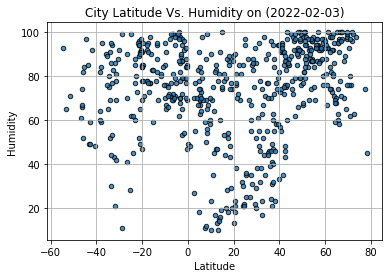

In [21]:
title = "City Latitude Vs. Humidity"
Fig_1 = clean_cities_data.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_1.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Cloudiness Plot

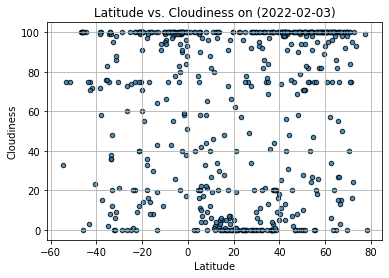

In [22]:
title = "Latitude vs. Cloudiness"
Fig_2 = clean_cities_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_2.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Wind Speed Plot

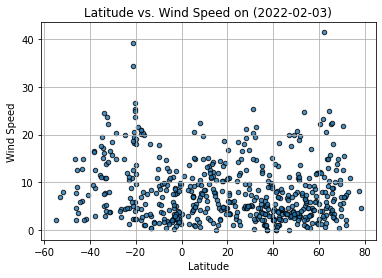

In [23]:
title = "Latitude vs. Wind Speed"
Fig_3 = clean_cities_data.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_3.get_figure().savefig(f"../output_data/{title}.png")

## Linear Regression

In [24]:
def plot_linear_regression(x_values,y_values,y_label,text_coordinates):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #print out
    print(f" Slope:{slope}\n",
      f"Intercept:{intercept}\n",
      f"The r-squared is:{rvalue}\n",
      '--------------------------\n',
      f'{line_eq}') 
    # Plot
    plt.scatter(x_values,y_values, edgecolor="black",linewidth=1,marker="o",alpha=0.8)
    plt.plot(x_values, regress_values, "r-") 
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    plt.savefig(f"../output_data/{title}.png")
    plt.show()

In [25]:
L=0
north_hemi = clean_cities_data.query(f"Lat >= {L}")
south_hemi = clean_cities_data.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:-1.4095393231086597
 Intercept:94.51899611897927
 The r-squared is:-0.8808382397094164
 --------------------------
 y = -1.41 x + 94.52


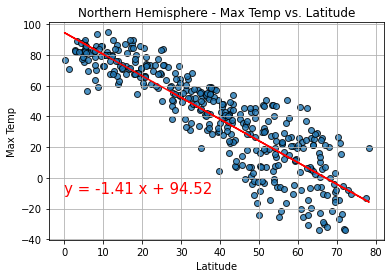

In [26]:
title = "Northern Hemisphere - Max Temp vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (0,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:0.3701042068719413
 Intercept:81.3078411803038
 The r-squared is:0.5137943781073616
 --------------------------
 y = 0.37 x + 81.31


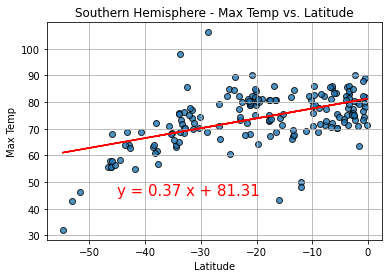

In [27]:
title ="Southern Hemisphere - Max Temp vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (-45,45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.5609601187371777
 Intercept:50.36158794070914
 The r-squared is:0.46900466071129565
 --------------------------
 y = 0.56 x + 50.36


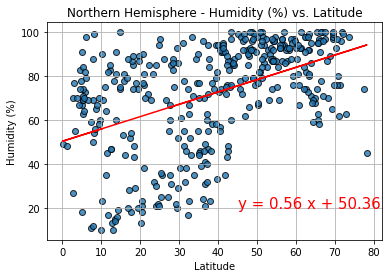

In [28]:
title="Northern Hemisphere - Humidity (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.2880753066562254
 Intercept:82.98747833302187
 The r-squared is:0.24046180250075191
 --------------------------
 y = 0.29 x + 82.99


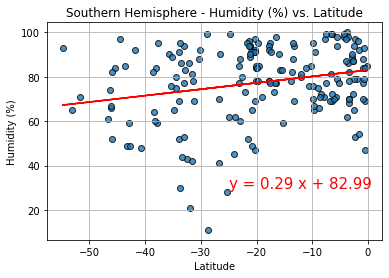

In [29]:
title="Southern Hemisphere - Humidity (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.7272546946076514
 Intercept:30.637041602967052
 The r-squared is:0.3463358624766875
 --------------------------
 y = 0.73 x + 30.64


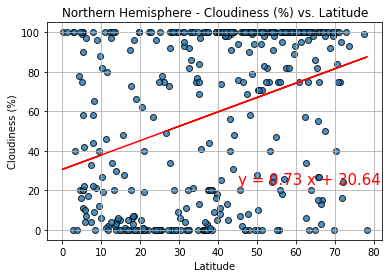

In [30]:
title="Northern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (45,23))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.5935945742045381
 Intercept:83.29528559638982
 The r-squared is:0.2369772180276846
 --------------------------
 y = 0.59 x + 83.3


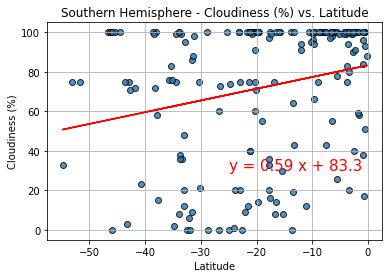

In [31]:
title="Southern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:-0.0017229659289057552
 Intercept:7.529921151400645
 The r-squared is:-0.006034483709707824
 --------------------------
 y = -0.0 x + 7.53


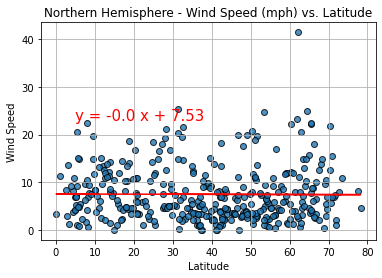

In [32]:
title="Northern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Wind Speed"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (5,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:0.5935945742045381
 Intercept:83.29528559638982
 The r-squared is:0.2369772180276846
 --------------------------
 y = 0.59 x + 83.3


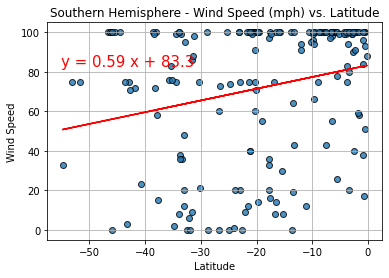

In [33]:
title="Southern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (-55,83))